In [1]:
import torch
import torch.nn as nn
from torchvision import models
import torchvision
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from contrastive_learner import ContrastiveLearner

In [6]:
resnet = models.resnet50(pretrained=True)
resnet.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3), bias=False)

learner = ContrastiveLearner(
    resnet,
    image_size = 32,          # image size
    hidden_layer = 'avgpool',  # layer name where output is hidden dimension. this can also be an integer specifying the index of the child
    project_hidden = True,     # use projection head
    project_dim = 128,         # projection head dimensions, 128 from paper
    use_nt_xent_loss = True,   # the above mentioned loss, abbreviated
    temperature = 0.1,         # temperature
    augment_both = True        # augment both query and key
)

opt = torch.optim.Adam(learner.parameters(), lr=3e-4)

/home/luthra/miniconda3/envs/simclr/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/luthra/miniconda3/envs/simclr/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
# random data
def sample_batch_images():
    return torch.randn(20, 3, 256, 256)

# images from CIFAR-100
cifar100_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
cifar100_loader = torch.utils.data.DataLoader(cifar100_dataset, batch_size=20, shuffle=True)

Files already downloaded and verified


torch.Size([20, 3, 32, 32]) torch.Size([20])


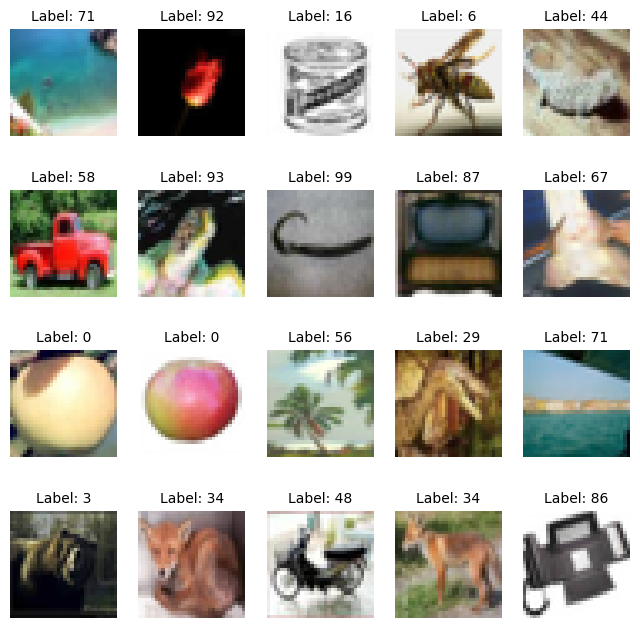

In [23]:
# explore the dataset
for batch in cifar100_loader:
    images, labels = batch
    print(images.shape, labels.shape)
    
    # plot the images in the batch with labels
    fig, ax = plt.subplots(4, 5, figsize=(8, 8))
    for i in range(20):
        ax[i//5, i%5].imshow(images[i].permute(1, 2, 0).numpy())
        ax[i//5, i%5].set_title(f'Label: {labels[i].item()}', fontsize=10)
        ax[i//5, i%5].axis('off')

    plt.axis('off')
    plt.show()


    # # plot using make_grid and add labels too
    # grid = make_grid(images, nrow=5)
    # plt.imshow(grid.permute(1, 2, 0).numpy())
    # plt.title('CIFAR-100')
    # plt.show()

    break
    

In [11]:
# training loop
for epoch in range(100):
    # images = sample_batch_images() # random images
    images, _ = next(iter(cifar100_loader)) # CIFAR-100
    loss = learner(images)
    opt.zero_grad()
    loss.backward()
    opt.step()

    # print loss

    print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 15.340776443481445
Epoch: 1, Loss: 34.337100982666016
Epoch: 2, Loss: 33.50996398925781
Epoch: 3, Loss: 67.28343200683594
Epoch: 4, Loss: 32.61194610595703
Epoch: 5, Loss: 17.857572555541992
Epoch: 6, Loss: 17.511106491088867
Epoch: 7, Loss: 17.093982696533203
Epoch: 8, Loss: 17.50555992126465
Epoch: 9, Loss: 11.816497802734375
Epoch: 10, Loss: 10.626199722290039
Epoch: 11, Loss: 9.39366340637207
Epoch: 12, Loss: 6.628287315368652
Epoch: 13, Loss: 9.75474739074707
Epoch: 14, Loss: 8.629583358764648
Epoch: 15, Loss: 6.885249137878418
Epoch: 16, Loss: 6.092289447784424
Epoch: 17, Loss: 4.68705415725708
Epoch: 18, Loss: 4.761110305786133
Epoch: 19, Loss: 5.0326828956604
Epoch: 20, Loss: 4.760494232177734
Epoch: 21, Loss: 4.597634315490723
Epoch: 22, Loss: 4.003803253173828
Epoch: 23, Loss: 3.938537120819092
Epoch: 24, Loss: 3.369771957397461
Epoch: 25, Loss: 3.37983775138855
Epoch: 26, Loss: 3.7008728981018066
Epoch: 27, Loss: 3.0410735607147217
Epoch: 28, Loss: 3.59736394

In [1]:
import numpy as np
k_5 = [np.float64(32.27085569165199), np.float64(44.929928831669976), np.float64(52.021575769901595), np.float64(56.04059259057432), np.float64(59.16157404833894), np.float64(59.97906817400304), np.float64(62.28856860903617), np.float64(62.55034364555855), np.float64(64.27189535980477), np.float64(65.33302324121757)]
k_10 = [np.float64(35.00322803135417), np.float64(47.75491524182624), np.float64(54.45794434470923), np.float64(58.40246567021193), np.float64(61.555660135959656), np.float64(62.582563951734784), np.float64(64.2598198911361), np.float64(64.70884466805568), np.float64(66.24514026498684), np.float64(67.30025179982565)]
k_20 = [np.float64(37.09325700072078), np.float64(49.6113831782893), np.float64(55.94996930501619), np.float64(59.51393993400569), np.float64(62.566460894112176), np.float64(63.732292505578755), np.float64(65.03905141491894), np.float64(65.65117803581215), np.float64(67.17942413120788), np.float64(67.9808192538011)]

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.visualize import line_plot

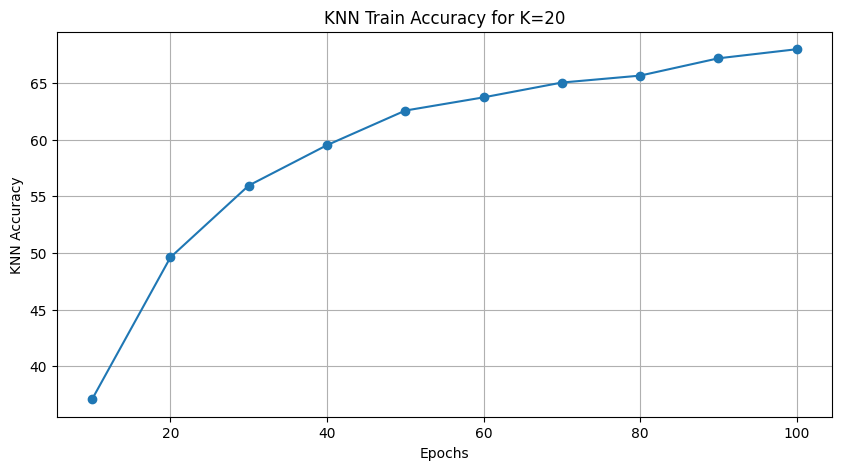

In [6]:
x_axis = [i for i in range(10, 110, 10)]
line_plot(x_axis, k_20, x_label='Epochs', y_label='KNN Accuracy',
                  title=f"KNN Train Accuracy for K=20",
                  output_dir="/home/luthra/understanding-ssl/experiments/", 
                   experiment_name=f"simclr/cifar10/",
                  filename=f"knn_train_acc_k20.png")

## Evaluation

In [1]:
import torch
import torch.nn as nn

import torchvision

import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

from models.simclr import SimCLR

from utils.dataset_loader import get_dataset
from utils.metrics import KNN
from utils.analysis import cal_cdnv, embedding_performance_nearest_mean_classifier
from scripts.visualize import line_plot

from collections import defaultdict
from tqdm.notebook import tqdm

In [2]:
dataset_name = 'cifar10'
width_multiplier = 2
hidden_dim = 2048
projection_dim = 64
track_performance = True
K = [5, 10, 20]
device = 'cuda:2'

In [3]:
# define model
encoder = torchvision.models.resnet50(pretrained=False)
ssl_model = SimCLR(model=encoder,
                dataset=dataset_name,
                width_multiplier=width_multiplier,
                hidden_dim=hidden_dim,
                projection_dim=projection_dim,
                track_performance=track_performance,
                K=K)

/home/luthra/miniconda3/envs/simclr/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/luthra/miniconda3/envs/simclr/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [4]:
# load ckpts

# snapshot for multi-gpu
snapshot_path = "/home/luthra/understanding-ssl/experiments/simclr/cifar10/snapshot.pth"
snapshot = torch.load(snapshot_path, map_location=device, weights_only=True)
state_dict = snapshot['MODEL_STATE']
epochs_trained = snapshot['EPOCHS_RUN']
print(f"Loaded model from epoch {epochs_trained}")
ssl_model.load_state_dict(state_dict)

# # checkpoint for single GPU
# ckpt_path = "/home/luthra/understanding-ssl/experiments/simclr/cifar10/checkpoints/epoch_1000.pth"
# ckpt = torch.load(ckpt_path, map_location=device, weights_only=True)
# ssl_model.load_state_dict(ckpt)

ssl_model = ssl_model.to(device)
ssl_model.eval()
print("Model loaded successfully")

Loaded model from epoch 990
Model loaded successfully


In [5]:
dataset_path = "/home/luthra/understanding-ssl/data"
augment_both = False
batch_size = 128

In [6]:
# get dataset
_, loader = get_dataset(dataset_name=dataset_name, 
                        dataset_path=dataset_path,
                        augment_both_views=augment_both,
                        batch_size=batch_size,)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
# evaluator
knn_accs_train = defaultdict(list)
knn_accs_test = defaultdict(list)
knn_evaluator = KNN(ssl_model, K, device=device)

train_acc, test_acc = knn_evaluator.knn_eval(loader)

100%|██████████| 391/391 [00:07<00:00, 54.37it/s]


Train Accuracy for k=5: 87.93
Train Accuracy for k=10: 88.16
Train Accuracy for k=20: 88.01


In [8]:
from collections import namedtuple

Settings = namedtuple("Settings", ["batch_size", "device", "num_output_classes"])
settings = Settings(batch_size=128, device="cuda:2", num_output_classes=10)

In [9]:
cdnvs = cal_cdnv(ssl_model, settings, loader)
print(cdnvs)

[2.0342351580655413, 0.8887044353921819]


In [10]:
train_accuracy_rates = embedding_performance_nearest_mean_classifier(ssl_model, settings, loader)
print(train_accuracy_rates)

[0.8545, 0.83948]
